In [10]:
import torch
import numpy as np
import math
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random
import matplotlib as mpl
import os
import gc
import pandas as pd
import csv
from numpy import *
from datetime import date
import time
import builtins
plt.rcParams['figure.dpi'] = 300

In [11]:
amino_acid = ['A', 'V', 'F', 'I', 'L','D','E','K','S','T','Y','C','N','Q', 'P','M', 'R', 'H', 'W', 'G']
hydro = [1.8, 4.2, 2.8, 4.5, 3.8, -3.5, -3.5, -3.9, -0.8, -0.7, -1.3, 2.5, -3.5, -3.5, -1.6, 1.9, -4.5, -3.2, -0.9, -0.4]
hydro = np.abs(hydro)
num_aa = len(amino_acid)
print(f'Total numnber of amino acids are {len(amino_acid)}')

Total numnber of amino acids are 20


## Load the Importance, One-hot encoding and sequence length

In [12]:
ohe = np.load('./data/x_test.npy', allow_pickle=True)
seq_len = np.load('./data/len_test.npy', allow_pickle=True)
imp = np.load('./model/importance_test.npy', allow_pickle=True)
prop = np.load('./data/y_test.npy', allow_pickle=True)


In [13]:
dict_score = {}
for i in range(num_aa):
    dict_score[i] = []
    
score = np.zeros((len(amino_acid),))
count = np.zeros((len(amino_acid),))

N = ohe.shape[0]
for i in range(N):
    if prop[i] != 0:
        l = int(seq_len[i])
        x = np.argmax(ohe[i,0:l,:],axis=-1)
        sample_imp = imp[i,0:l]#/max(imp[i,0:l])
        for aa in range(num_aa):
            idx = (x==aa)
            score[aa] += np.sum(sample_imp[idx])
            count[aa] += np.sum(idx*1)
            mean_imp = (np.sum(sample_imp[idx])/(np.sum(idx*1)+1E-18))
            if mean_imp != 0:
                dict_score[aa].append(mean_imp)

# score = np.mean(d)
score = score/count
score = score/max(score)

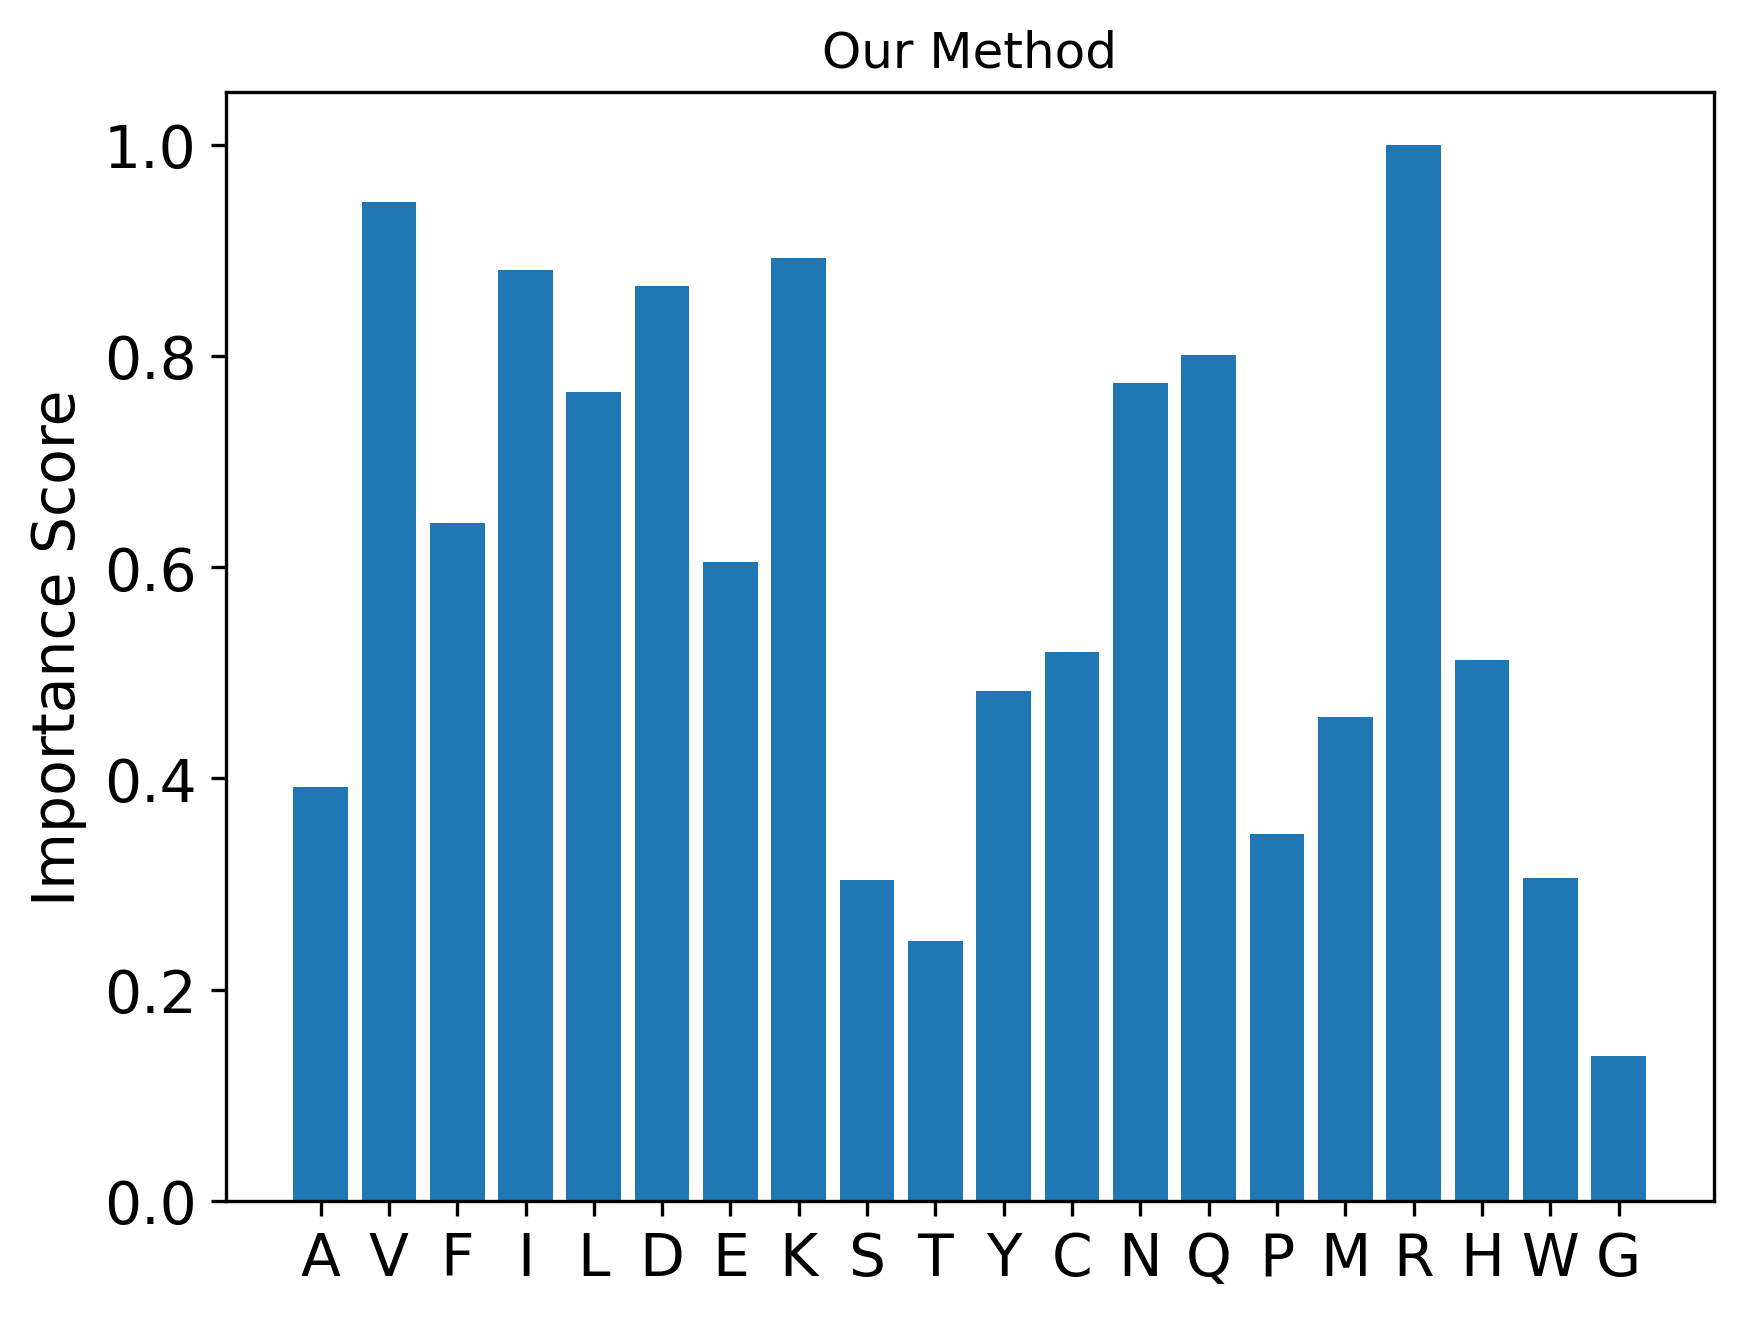

In [14]:
plt.bar(amino_acid,score)
plt.ylabel('Importance Score', fontsize=14)
# plt.title('Grad-SAM Method')
plt.title('Our Method')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

0.9596156725450026


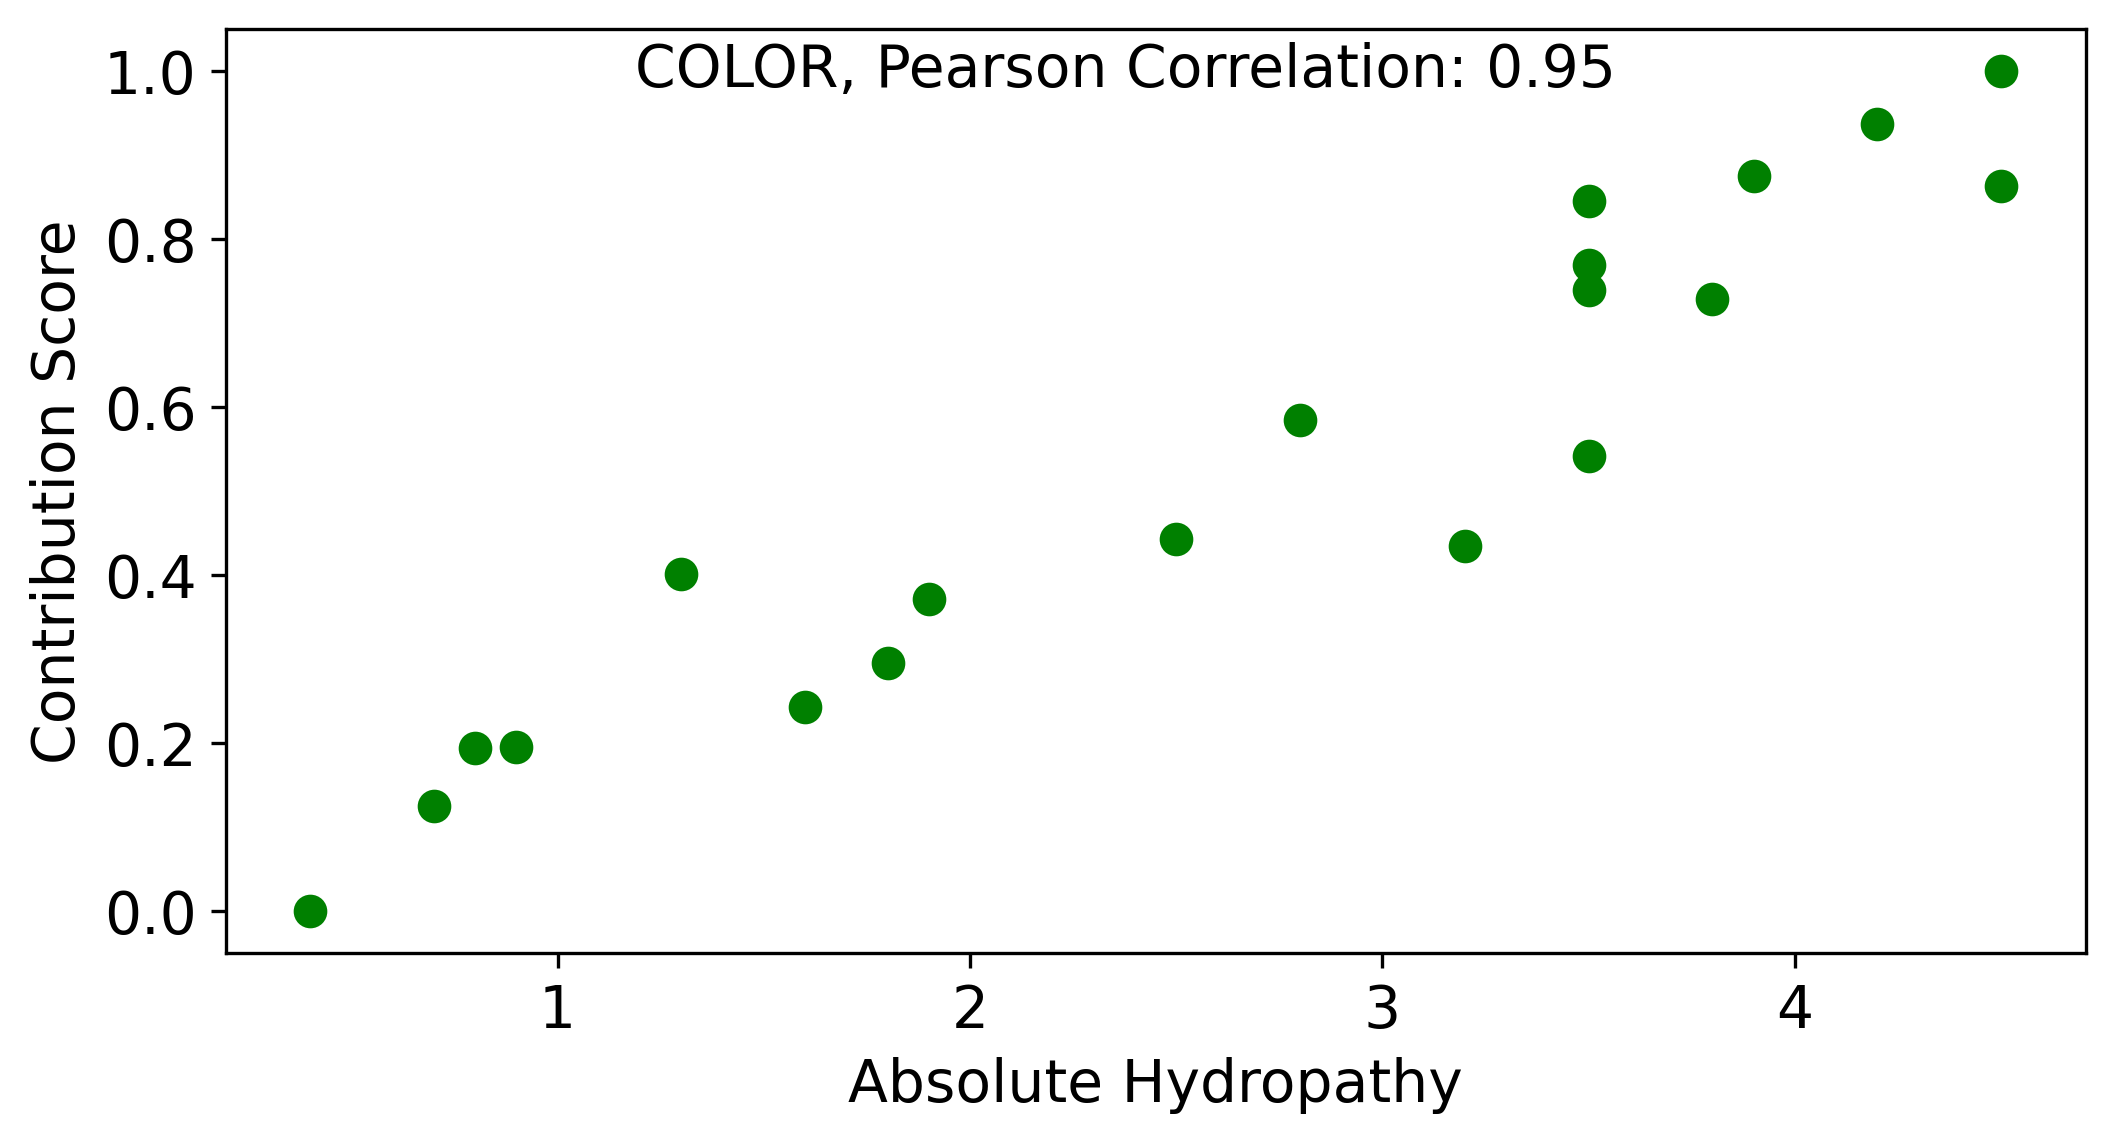

In [15]:
# np.save('./motif_results/complor_score', score.T)

from scipy.stats import spearmanr
score = (score-min(score))/(max(score)-min(score))
pcc = np.corrcoef(hydro, score.T)[0,1]
spea = spearmanr(hydro, score.T)
spea = spea.correlation
print(spea)
plt.figure(figsize=(8, 4))
plt.scatter(hydro, score, s=50,color='green')
plt.suptitle(f'COLOR, Pearson Correlation: {round(pcc,2)}', fontsize=14, y=0.87) 
# plt.title(f'COLOR, Pearson Correlation: {round(pcc,2)}', fontsize=14)
plt.xlabel('Absolute Hydropathy', fontsize=14)
plt.ylabel('Contribution Score', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0,1.2,0.2),fontsize=14)
plt.show()